# Description:

- Project purpose is analysing Netflix users behaviours like trends, prefrences. To do that Visualization and Analytics is used.


## Importing Dependincies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading data.
userbase = pd.read_csv("netflix_userbase.csv")

df = userbase.copy()

df.head()

In [ ]:
df.shape # Checking Number of rows and columns.

(2500, 10)

In [ ]:
df.duplicated().sum() # Check if duplicated values.

0

In [ ]:
df.isna().sum() # Checking Number of null values for each column.

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [ ]:
# Change column names (Make them lowercase and replace spaces with underscore.)

df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")

In [ ]:
df.head()

,user_id,subscription_type,monthly_revenue,join_date,last_payment_date,country,age,gender,device,plan_duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [ ]:
df.dtypes

user_id               int64
subscription_type    object
monthly_revenue       int64
join_date            object
last_payment_date    object
country              object
age                   int64
gender               object
device               object
plan_duration        object
dtype: object

In [ ]:
df["join_date"] = pd.to_datetime(df["join_date"], format="%d-%m-%y")
df["last_payment_date"] = pd.to_datetime(df["last_payment_date"], format="%d-%m-%y")


In [ ]:
df["subscription_time"] = df["last_payment_date"] - df["join_date"] # Getting subscriotion time.

## Data Visualization

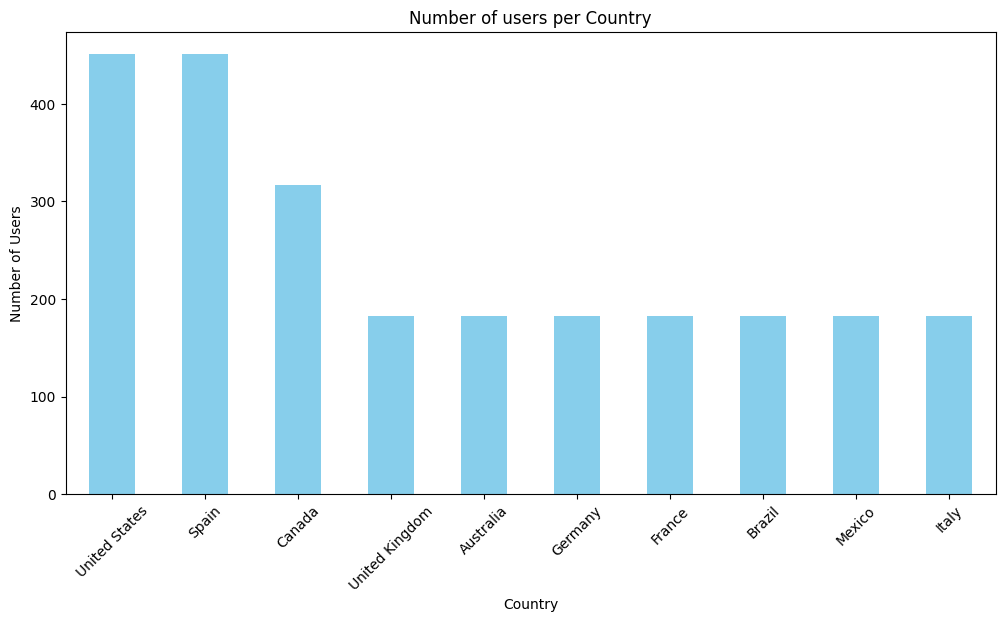

In [ ]:
plt.figure(figsize=(12, 6))
df["country"].value_counts().plot(kind="bar", color="skyblue")

plt.title("Number of users per Country")
plt.xlabel("Country")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.show()

In [ ]:
column_titles = {
    "gender" : ("Gender Counts", "skyblue"),
    "device" : ("Device Counts", "red"),
    "subscription_type" : ("Subscription Type Counts", "green")
}

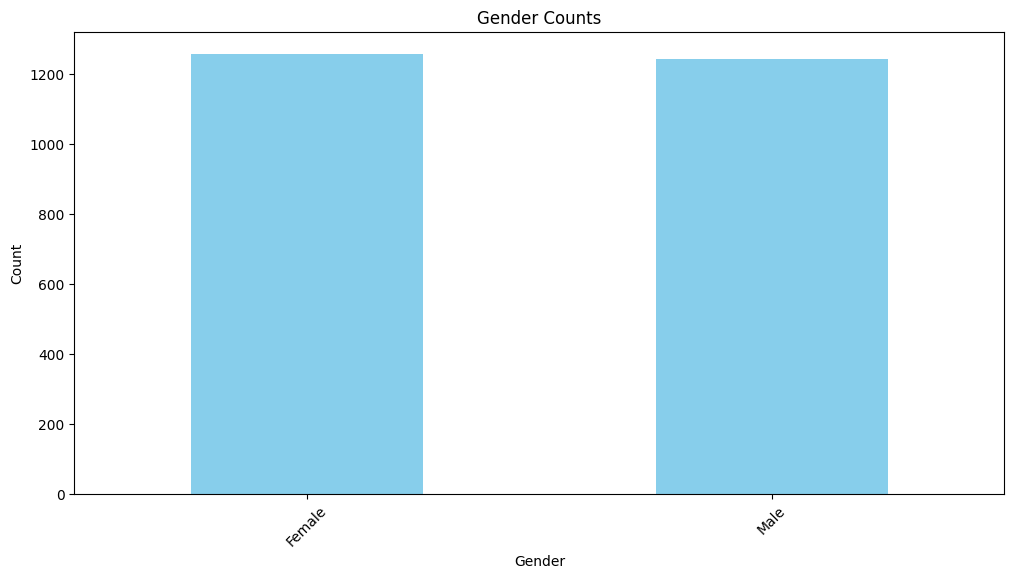

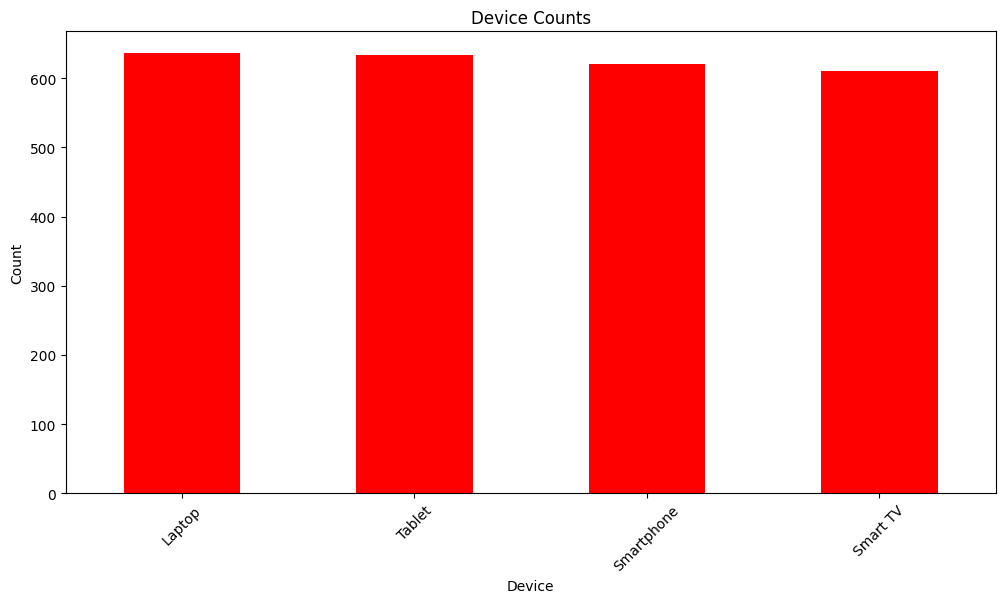

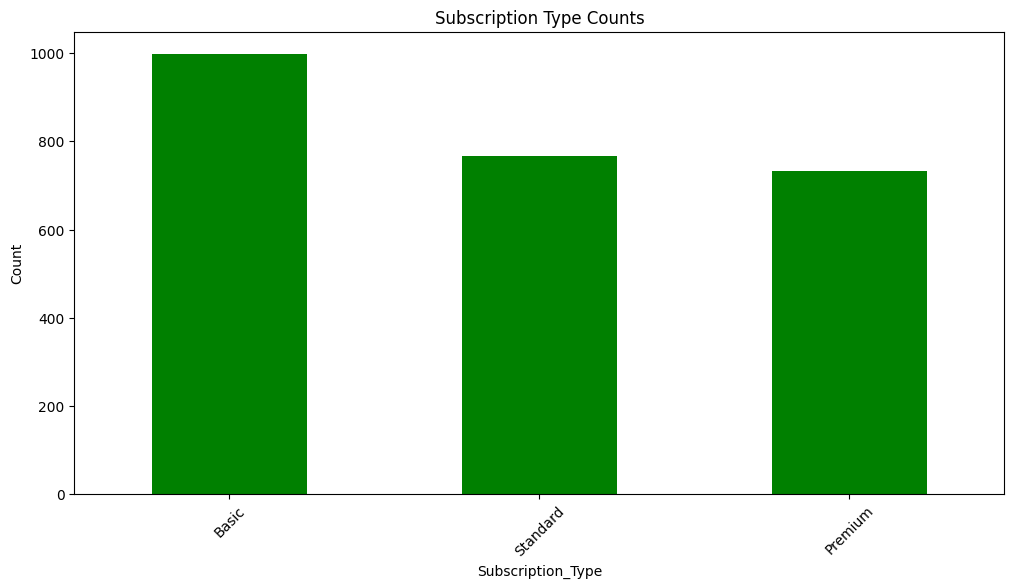

In [ ]:
for column, (title, color) in column_titles.items():
    plt.figure(figsize=(12, 6))
    df[column].value_counts().plot(kind="bar", color=color)

    plt.title(title)
    plt.xlabel(column.title())
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()
    

### User by country

In [ ]:
user_counts_by_country = df["country"].value_counts().reset_index()
user_counts_by_country.columns = ["Country", "User Count"]

import plotly.express as px

In [ ]:
fig = px.choropleth(
    user_counts_by_country, locations="Country", locationmode="country names", color="User Count",
    hover_name="Country", title="User Distribution by Country", color_continuous_scale=px.colors.sequential.Plasma
)

fig.update_layout(
    width = 1000, # Adjust the width
    height = 700, # Adjust height
    title_font_size = 24,
    geo=dict(
        showframe = False,
        showcoastlines=False,
        
    )
)

fig.show()

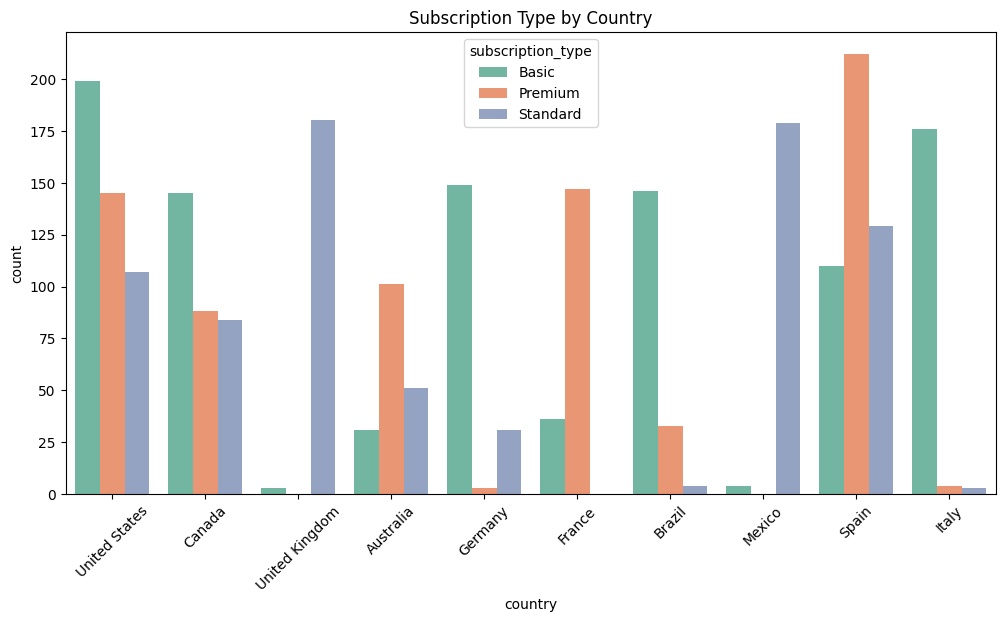

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x="country", hue="subscription_type", data=df, palette="Set2")
plt.title("Subscription Type by Country")
plt.xticks(rotation=45)
plt.show()

NameError: name 'plt' is not defined